Cho một bộ data MNIST bao gồm 60000 ngàn ảnh để huấn luyện 28 * 28 chữ số viết tay.
Tiến hành xây dựng mạng này bao gồm
- 1 lớp Conv cỡ 3 * 3 bao gồm 32 kernels
- 1 lớp Max Pooling cỡ 2 * 2
- 1 lớp duỗi Flatten
- 1 lớp Dense 128
- 1 lớp Dense 10

Bạn hay huấn luyện model đến khi nào độ chính xác lên đến 99.8 % nhé

Giới thiệu về dữ liệu

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

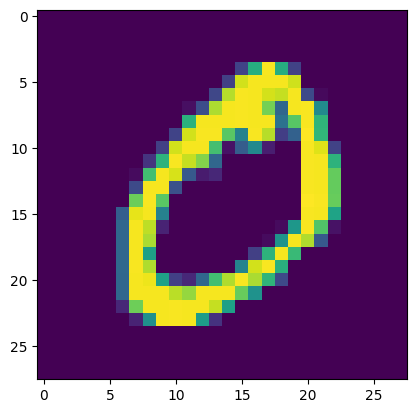

In [ ]:
plt.imshow(training_images[1])

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_images[0].shape

(28, 28)

In [ ]:
training_labels[0]

np.uint8(5)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
import numpy as np

In [ ]:
training_images = np.expand_dims(training_images, axis=-1)  # (60000,28,28,1)
test_images = np.expand_dims(test_images, axis=-1)          # (10000,28,28,1)

In [ ]:
valid_images = test_images[:2000]
valid_labels = test_labels[:2000]


In [ ]:
test_images_final = test_images[2000:]
test_labels_final = test_labels[2000:]


In [ ]:
# @title
training_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
# Chuẩn hóa lại dữ liệu bằng cách chia các giá trị của pixel cho 255.0
# Sử dụng test_images, test_labels để làm tập validation
training_images = training_images.astype(float) /255.0
test_images = test_images.astype(float) /255.0
valid_images = valid_images.astype(float) /255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
training_labels = lb.fit_transform(training_labels)
valid_labels = lb.transform(valid_labels)
test_labels_final = lb.transform(test_labels_final)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Convolution2D

# Khởi tạo model
model = Sequential()
width = 3
height = 3
classes = 32
shape=(28,28,1)
# shape = (3,3,32)
# Thêm một lớp tích chập + lớp Activation: relu
model.add(Convolution2D(32,(3,3),padding ='same',input_shape=shape,activation='relu'))


# Thêm một lớp Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Thêm một lớp duỗi
model.add(Flatten())

# Thêm một lớp Dense 128 + lớp Activation: relu
model.add(Dense(128,activation='relu'))

# Thêm một lớp Dense 10 + lớp Activation: Softmax
model.add(Dense(10,activation='softmax'))

# Chú ý thêm lớp Activation Softmax
# Kiểm tra lại mô hình

model.summary()





/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
aug = ImageDataGenerator(
    rotation_range=15,      # xoay ±15 độ
    zoom_range=0.2,         # zoom ±20%
    width_shift_range=0.1,  # dịch ngang ±10%
    height_shift_range=0.1 # dịch dọc ±10%

)


In [ ]:
learning_rate = 0.01

In [ ]:
from tensorflow.keras.optimizers import SGD


In [ ]:
epochs = 5
batch_size = 64
opt = SGD(learning_rate=learning_rate,momentum = 0.9)

In [ ]:
# Thêm một hàm tối ưu cho model

model.compile(optimizer = opt,loss='categorical_crossentropy',
metrics=['accuracy'])

# Tiến hành training

H = model.fit(aug.flow(training_images,training_labels,batch_size =batch_size),validation_data=(valid_images,valid_labels),steps_per_epoch =training_images.shape[0]//batch_size,epochs=epochs,verbose=1)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.6417 - loss: 1.0825 - val_accuracy: 0.9555 - val_loss: 0.1450
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8438 - loss: 0.4529

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8438 - loss: 0.4529 - val_accuracy: 0.9560 - val_loss: 0.1419
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9236 - loss: 0.2522 - val_accuracy: 0.9685 - val_loss: 0.1149
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.9531 - loss: 0.1363 - val_accuracy: 0.9665 - val_loss: 0.1162
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9446 - loss: 0.1833 - val_accuracy: 0.9720 - val_loss: 0.0896


In [ ]:
model.save('nhandienchu.keras')


In [ ]:
from tensorflow.keras.models import load_model
saved_model= load_model('nhandienchu.keras')

In [ ]:
result = saved_model.predict(test_images[1:2])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[8.2727247e-06, 1.7437718e-06, 9.9994886e-01, 4.7206626e-07,
        3.2193917e-10, 7.7434359e-10, 5.1012236e-08, 2.6696629e-09,
        4.0653849e-05, 3.4317489e-09]], dtype=float32)

In [ ]:
import numpy as np
final = np.argmax(result)
final = lb.inverse_transform(result)
final

array([2], dtype=uint8)

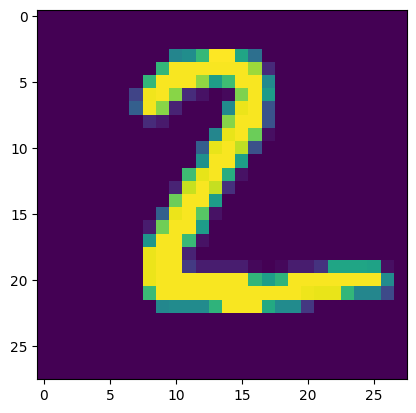

In [ ]:
plt.imshow(test_images[1])

In [ ]:
result2 = saved_model.predict(test_images[4:5])
import numpy as np
final = np.argmax(result2)
final = lb.inverse_transform(result2)
final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([4], dtype=uint8)

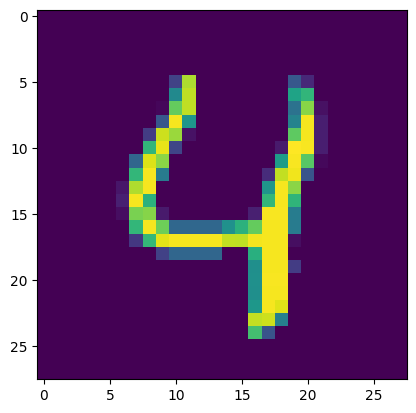

In [ ]:
plt.imshow(test_images[4])

Đang load model...
-> Load model thành công!

Chọn ảnh số viết tay để dự đoán:


Saving Screenshot 2025-11-19 at 4.12.40 PM.png to Screenshot 2025-11-19 at 4.12.40 PM.png


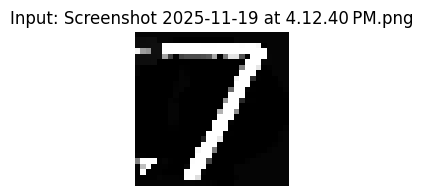

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
👉 Kết quả dự đoán: Số 7
📊 Độ tin cậy: 99.32%
-------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model  # <--- Cần import thư viện này
from google.colab import files

# --- BƯỚC 1: LOAD MODEL ---
# Đảm bảo file 'nhandienchu.keras' đang nằm trong thư mục Files của Colab
print("Đang load model...")
try:
    saved_model = load_model('nhandienchu.keras')
    print("-> Load model thành công!")
except IOError:
    print("-> LỖI: Không tìm thấy file 'nhandienchu.keras'. Hãy kiểm tra lại xem bạn đã save model chưa.")
    # Dừng chương trình nếu không có model
    raise SystemExit("Vui lòng upload hoặc train model trước.")


# --- BƯỚC 2: UPLOAD ẢNH ĐỂ TEST ---
print("\nChọn ảnh số viết tay để dự đoán:")
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn

    # --- BƯỚC 3: XỬ LÝ ẢNH (PRE-PROCESSING) ---
    # Load ảnh, ép về size 28x28 và chuyển sang ảnh xám (grayscale)
    img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')

    # Chuyển sang mảng numpy
    x = image.img_to_array(img)

    # Xử lý màu: Đảo ngược màu nếu ảnh là nền trắng chữ đen (ảnh chụp thường)
    # MNIST training data là nền đen chữ trắng
    if np.mean(x) > 128:
        x = 255.0 - x

    # Chuẩn hóa về [0, 1]
    x = x / 255.0

    # Hiển thị ảnh mà model thực sự "nhìn thấy"
    plt.figure(figsize=(2,2))
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title(f"Input: {fn}")
    plt.axis('off')
    plt.show()

    # Thêm chiều batch (Batch_size, Height, Width, Channels) -> (1, 28, 28, 1)
    x = np.expand_dims(x, axis=0)

    # --- BƯỚC 4: DỰ ĐOÁN ---
    prediction_probs = saved_model.predict(x)

    # Lấy kết quả
    predicted_digit = np.argmax(prediction_probs) # Lấy index có xác suất cao nhất
    confidence = np.max(prediction_probs) * 100   # Lấy giá trị xác suất đó

    print(f"👉 Kết quả dự đoán: Số {predicted_digit}")
    print(f"📊 Độ tin cậy: {confidence:.2f}%")
    print("-------------------------------")